# email spam filtering

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import accuracy_score

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
email_spam = pd.read_csv('spam.csv' , encoding='ISO-8859-1')

In [3]:
email_spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data preprocessing

In [4]:
email_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
email_spam.shape

(5572, 5)

In [6]:
email_spam.size

27860

In [7]:
email_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
email_spam.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
email_spam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
email_spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
email_spam.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)

In [12]:
email_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
email_spam.shape

(5572, 2)

In [14]:
email_spam.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
email_spam.sample()

,target,text
5524,spam,You are awarded a SiPix Digital Camera! call 0...


In [15]:
# LabelEncoder

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
email_spam['target']= encoder.fit_transform(email_spam['target'])

In [17]:
email_spam.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
email_spam.duplicated().sum()

403

In [19]:
email_spam = email_spam.drop_duplicates(keep='first')

In [20]:
email_spam.duplicated().sum()

0

# Exploratory data analysis

In [21]:
email_spam.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [22]:
email_spam['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

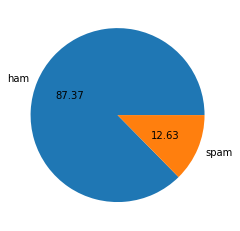

In [23]:
plt.pie(email_spam['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [24]:
# data is imbalanced

import nltk

In [25]:
!pip install nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
email_spam['num_length'] = email_spam['text'].apply(len)

C:\Users\hp\AppData\Local\Temp/ipykernel_15956/787912880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_spam['num_length'] = email_spam['text'].apply(len)


In [28]:
email_spam.head(3)

,target,text,num_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [29]:
email_spam['num_words'] = email_spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\hp\AppData\Local\Temp/ipykernel_15956/2376122083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_spam['num_words'] = email_spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [30]:
email_spam.head(3)

,target,text,num_length,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [31]:
email_spam['num_sentences'] = email_spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\hp\AppData\Local\Temp/ipykernel_15956/3677392647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_spam['num_sentences'] = email_spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [32]:
email_spam.head(3)

,target,text,num_length,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [33]:
email_spam[['num_length', 'num_words', 'num_sentences']].describe()

,num_length,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# ham
email_spam[email_spam['target']==0][['num_length', 'num_words', 'num_sentences']].describe()

,num_length,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# spam
email_spam[email_spam['target']==1][['num_length','num_words', 'num_sentences']].describe()

,num_length,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:ylabel='count'>

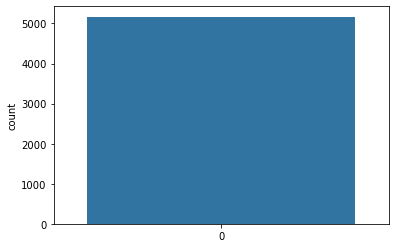

In [36]:
sns.countplot(email_spam['target'])

<AxesSubplot:xlabel='num_length', ylabel='Count'>

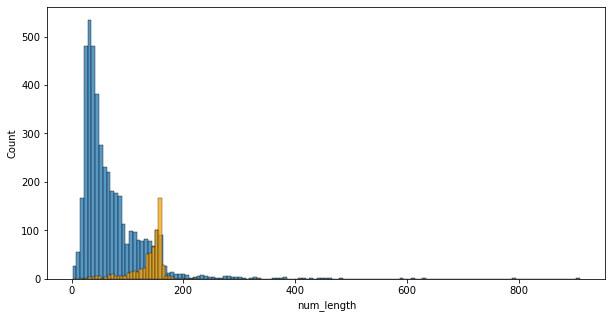

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(email_spam[email_spam['target']== 0]['num_length'])
sns.histplot(email_spam[email_spam['target']==1]['num_length'], color='orange')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

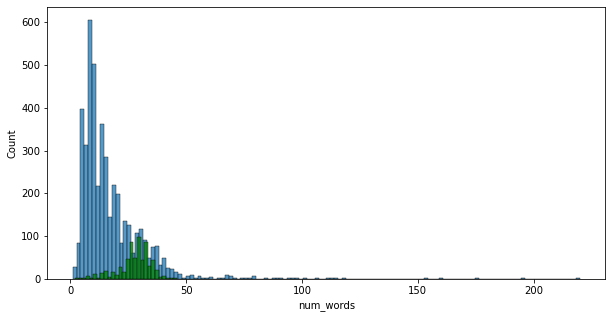

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(email_spam[email_spam['target']== 0]['num_words'])
sns.histplot(email_spam[email_spam['target']==1]['num_words'], color='green')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

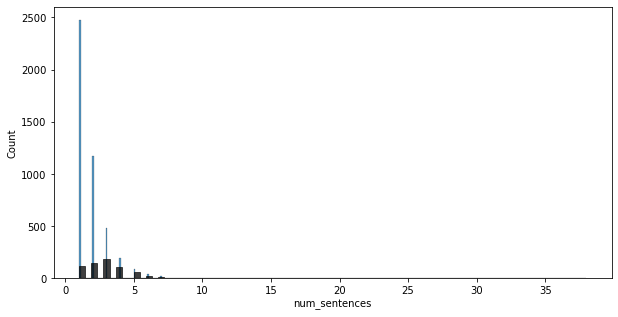

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(email_spam[email_spam['target']== 0]['num_sentences'])
sns.histplot(email_spam[email_spam['target']==1]['num_sentences'], color='black')

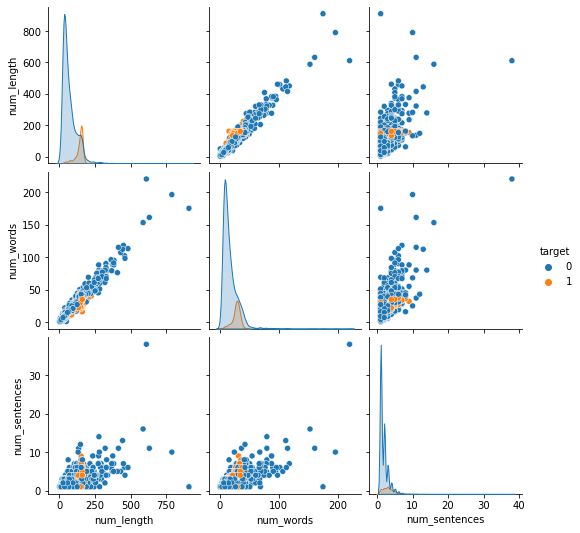

In [40]:
sns.pairplot(email_spam, hue='target')

<AxesSubplot:>

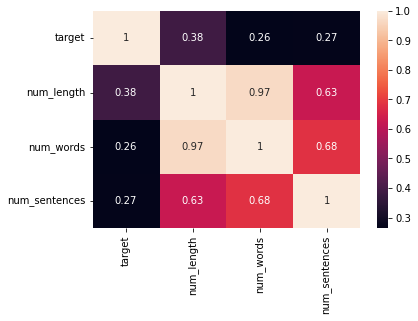

In [41]:
numeric_columns = email_spam.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(),annot=True)

In [42]:
# data preprocessing
# lowercase, tokenization, removing special characters, removing punctuations and stop words and stemming

In [43]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [44]:
#transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [45]:
email_spam['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [46]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('loving')

'love'

In [47]:
# separation of X and Y data

X = email_spam['text'].values
Y = email_spam['target'].values

In [48]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
# TRAINING AND TESTING DATASET
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2 , random_state= 0)

In [50]:
X_train.shape

(4135,)

In [51]:
Y_train.shape

(4135,)

In [52]:
X_test.shape

(1034,)

In [53]:
Y_test.shape

(1034,)

# Data modelling

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
cv = CountVectorizer()

In [55]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [56]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
len(x_train.toarray())

4135

In [58]:
len(x_train.toarray()[0])

7594

In [59]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [62]:
nb.fit(x_train, Y_train)

MultinomialNB()

In [63]:
x_test = cv.transform(X_test)

In [64]:
len(x_test.toarray())

1034

In [65]:
len(x_test.toarray()[0])

7594

In [66]:
y_pred = nb.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score

# finding testing accuracy
print("Testing Accuracy:")
accuracy_score(y_pred, Y_test)

Testing Accuracy:


0.9816247582205029

In [70]:
# finding training accuracy
print("Training Accuracy:")
nb.score(x_train,Y_train)

Training Accuracy:


0.9929866989117292

In [71]:
# by using pipeline
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(cv, nb)
pipe.fit(X_train,Y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [72]:
y_pred = pipe.predict(X_test)

In [74]:
accuracy_score(y_pred, Y_test)

0.9816247582205029

In [75]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
pipe.predict(email)

array([0])

# testing some mails

In [76]:
email = ['Nah I dont think he goes to usf, he lives aro...	']

In [77]:
clean_email = cv.transform(email)
len(clean_email.toarray()[0])

7594

In [78]:
check = nb.predict(clean_email)[0]
check

0

# Evaluating Function

In [84]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']

clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Ham Email!


In [85]:
import pickle
pickle.dump(pipe, open('naive_model.pkl','wb'))